# Telecom Customer Churn Prediction

This project aims to predict customer churn in a telecom company using  machine learning algorithms such as Randon forest and logistic Regression. Customer churn, also known as customer attrition, occurs when customers stop doing business with a company. The ability to predict which customers are at a higher risk of churning can help the company take proactive measures to retain them, thereby improving customer satisfaction and loyalty.

# Objective
The primary objective of this project is to:

1. Explore and preprocess the telecom customer data
2. Develop a predictive model that can accurately identify customers who are likely to churn
3. Evaluate the performance of the model and compare different machine learning algorithms

## Dataset

The dataset used in this project contains information about telecom customers, including demographic data, account information, and the services they have subscribed to. The target variable is a binary variable indicating whether the customer has churned or not.

# Methodology
We will follow these steps to build our churn prediction model:

1. Import the necessary libraries and load the dataset
2. Perform exploratory data analysis and data preprocessing
3. Split the dataset into training and testing sets
4. Train various machine learning models and evaluate their performance
5. Identify the best-performing model and discuss its suitability for the problem


Let's get started!


# Import the necessary Libraries 

In [85]:
#Import the required Libraries
import pandas as pd
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, auc 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


# Load the Data

In [86]:
# Read the CSV file into a Pandas DataFrame
telco_customer_churn_df = pd.read_csv(Path("../Resources/Telco_Customer_Churn.csv"))

# Review the DataFrame
display(telco_customer_churn_df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Exploration and Preprocessing

In [87]:
#Check for missing values
telco_customer_churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [88]:
#Check for duplicate rows
telco_customer_churn_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

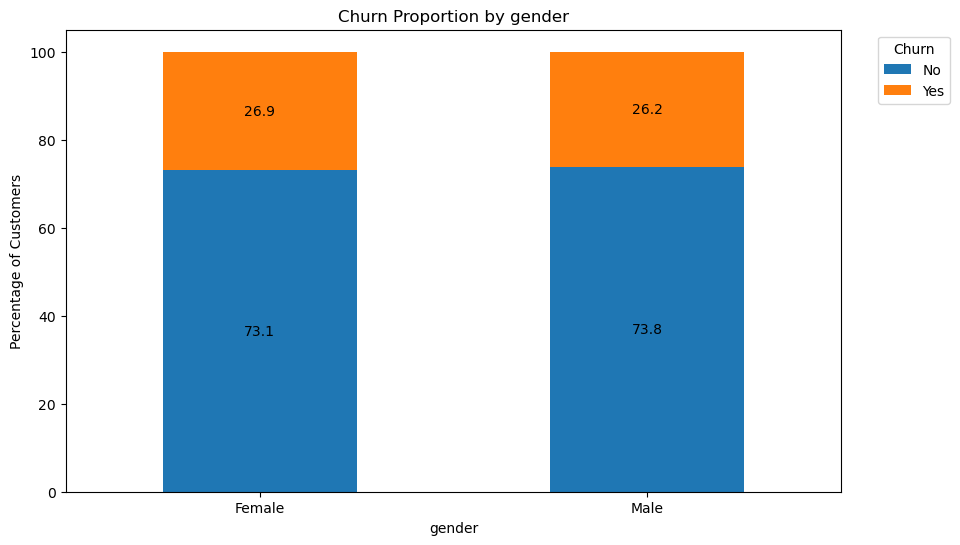

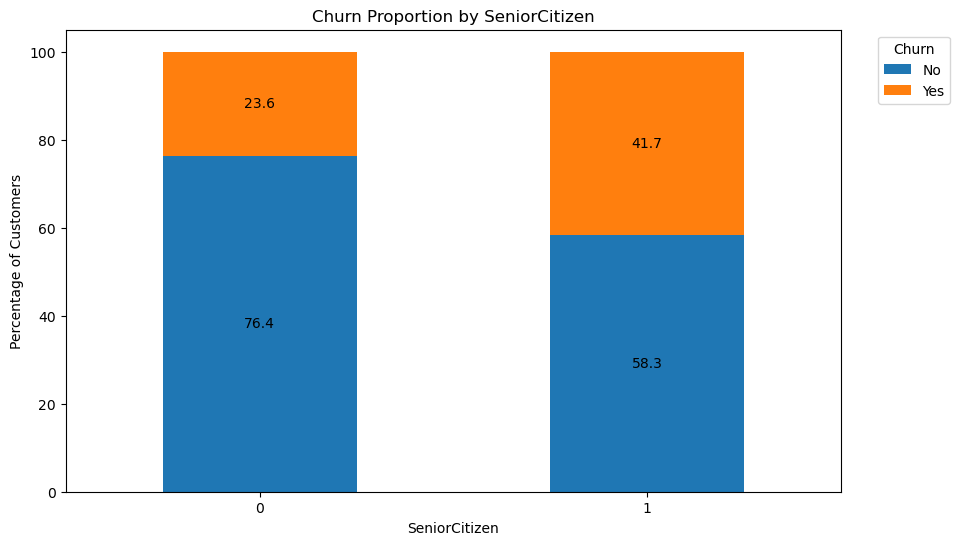

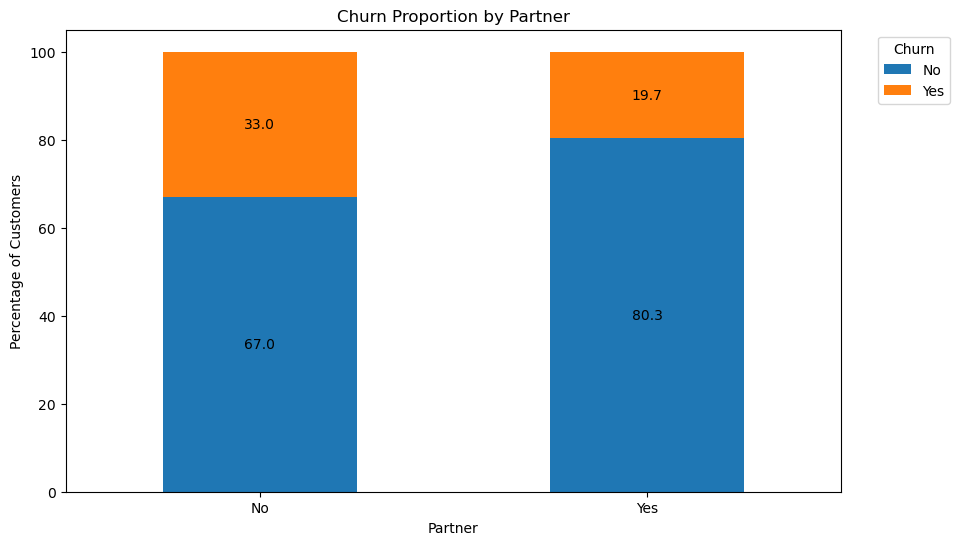

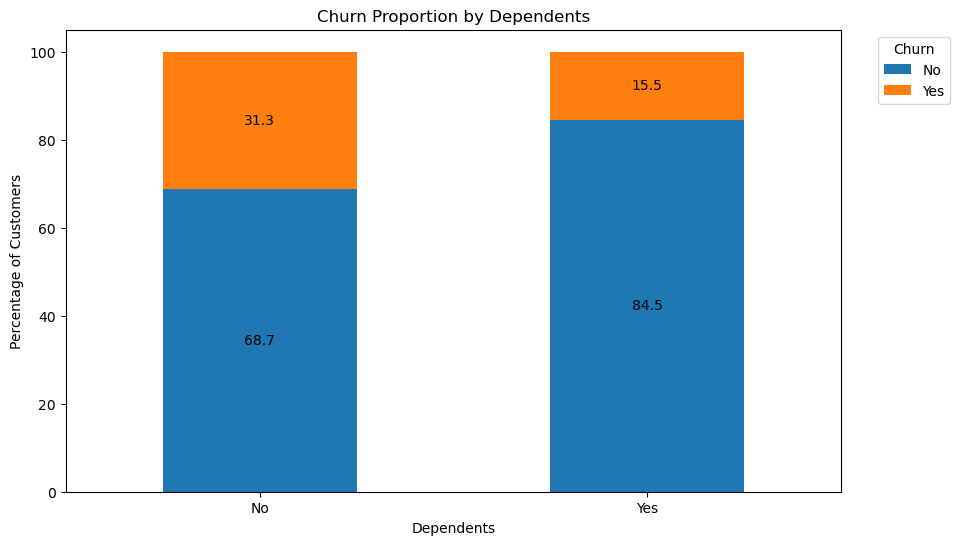

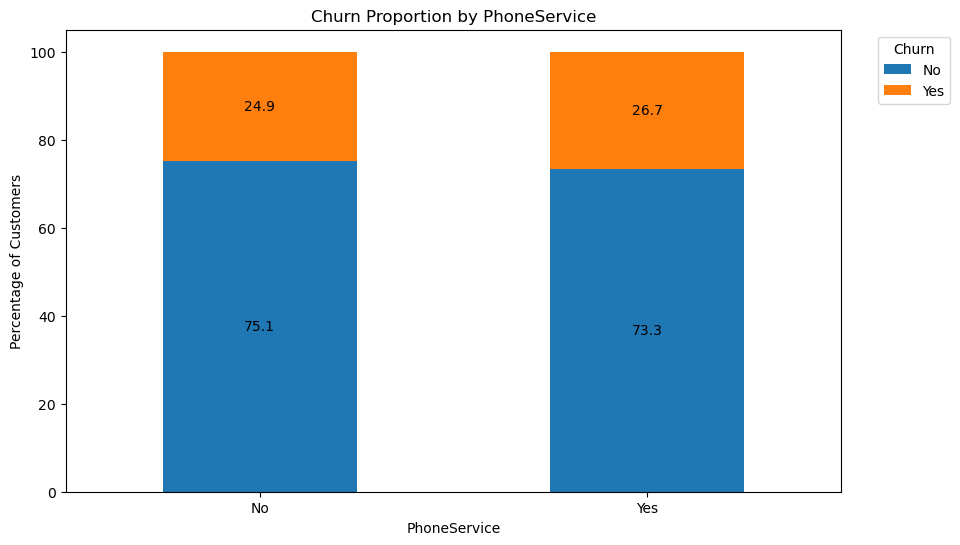

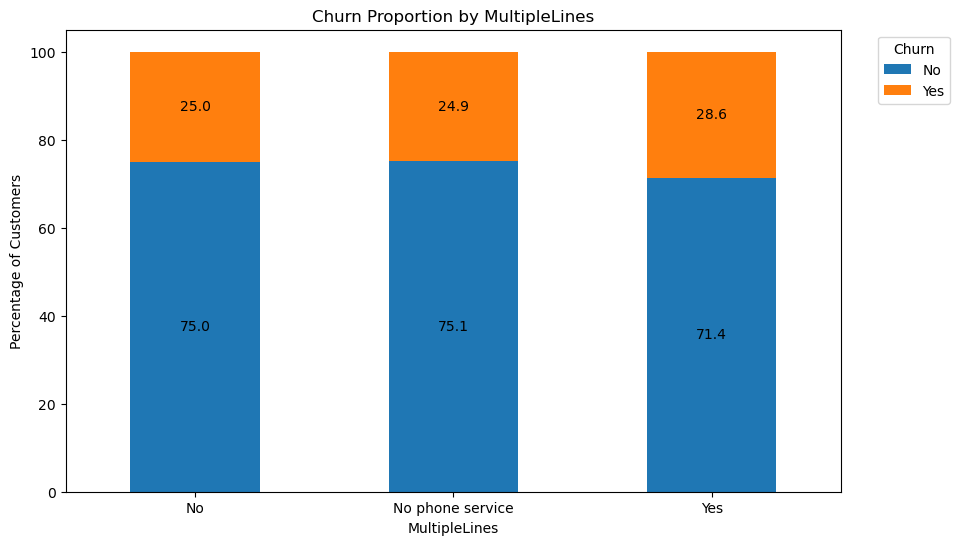

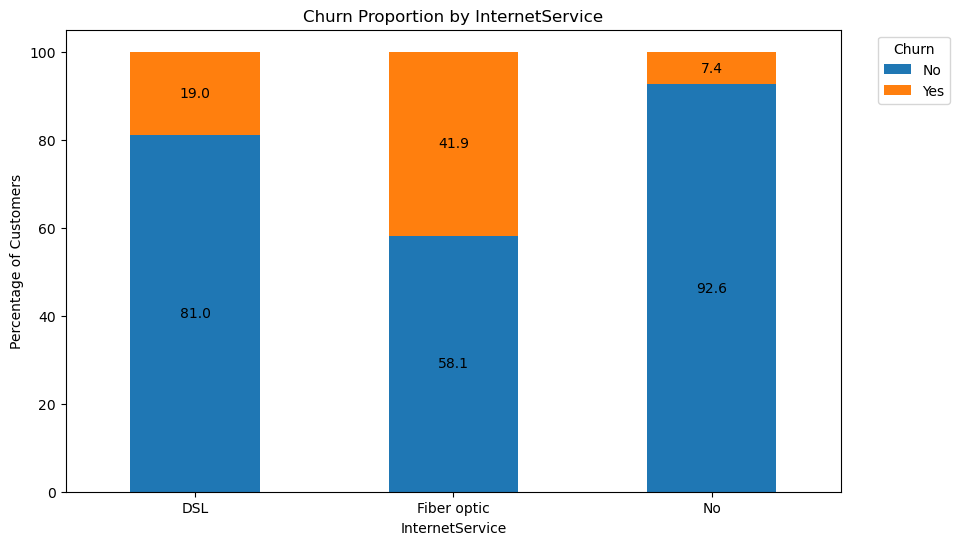

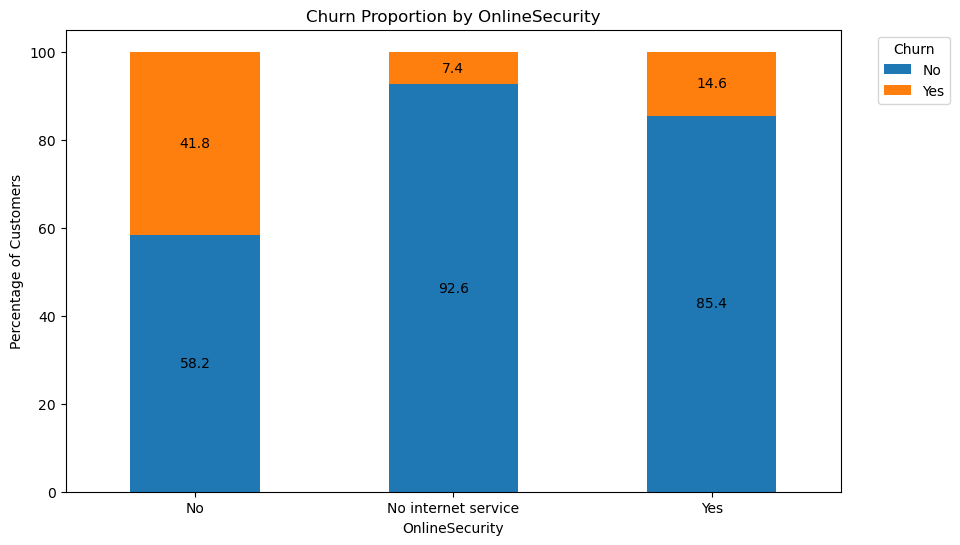

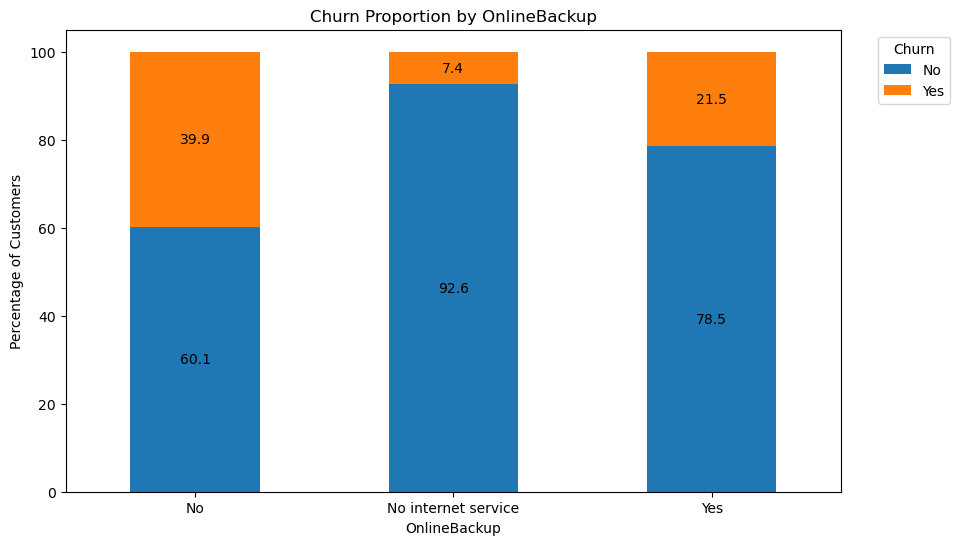

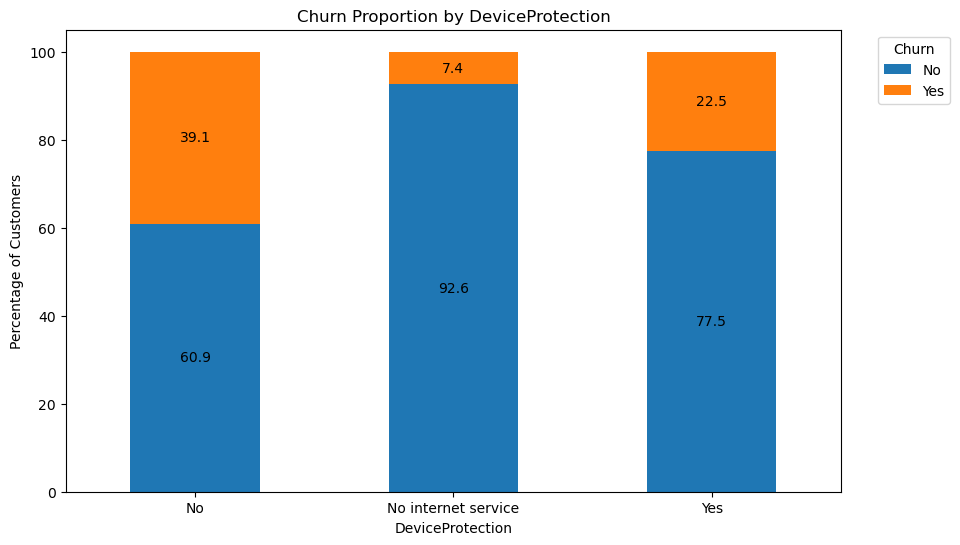

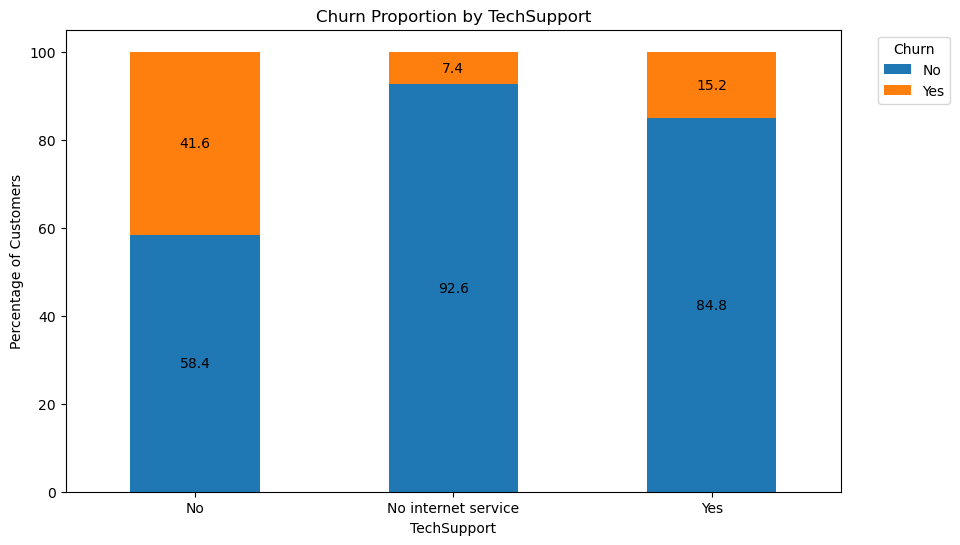

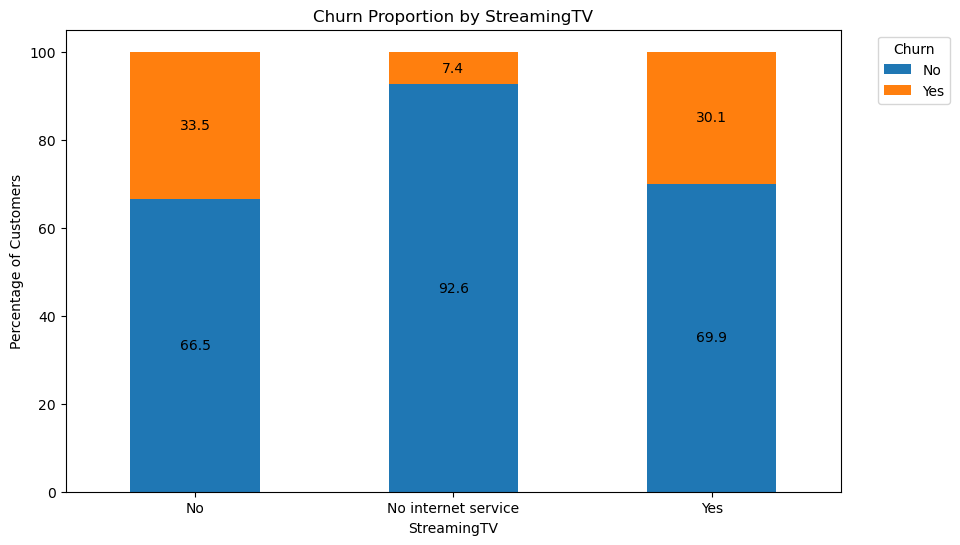

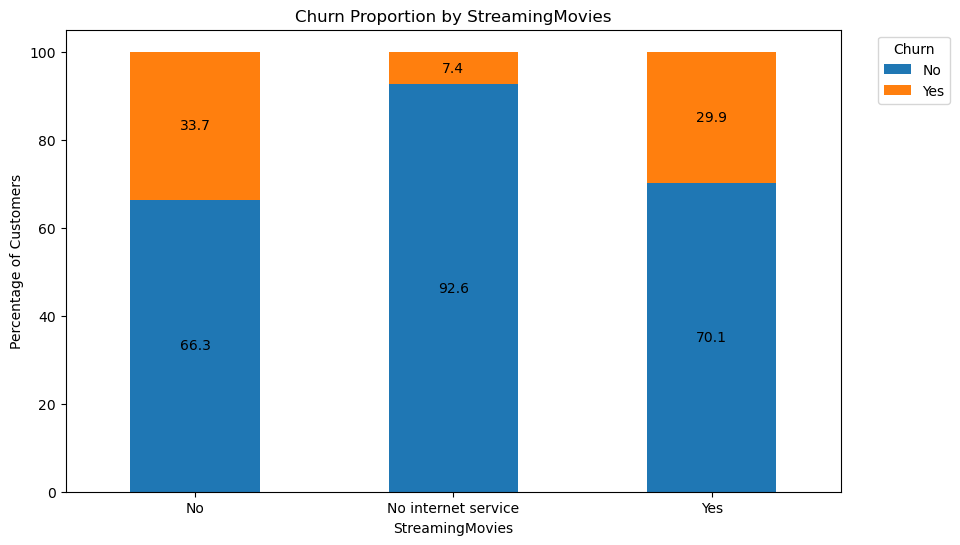

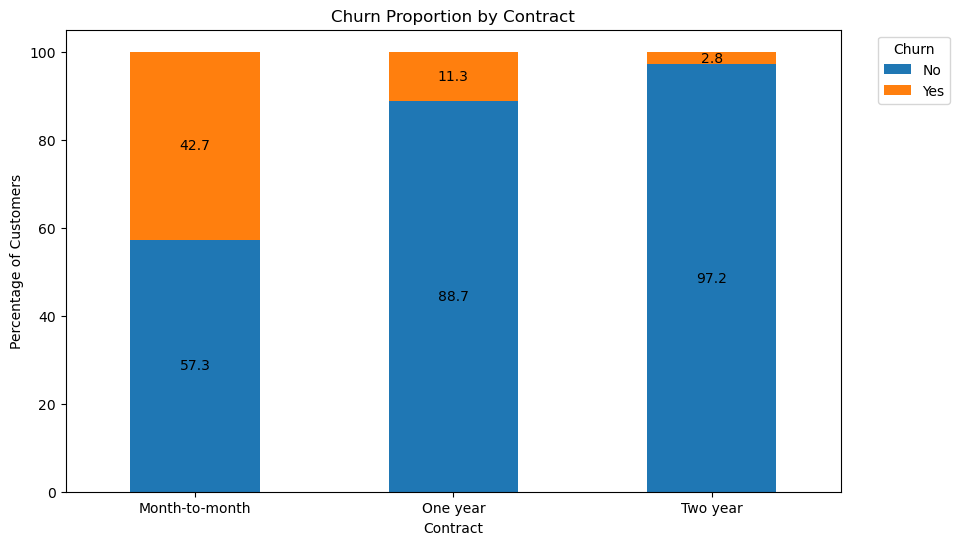

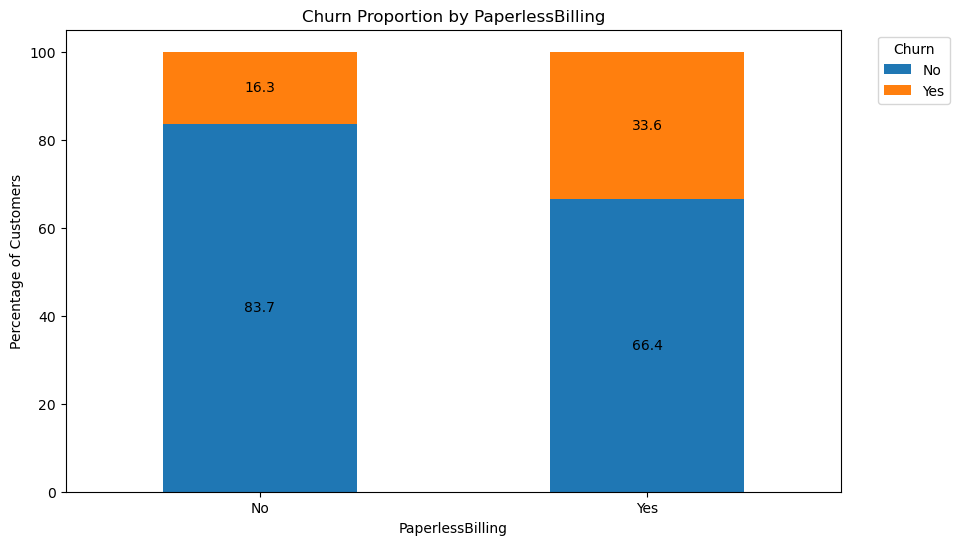

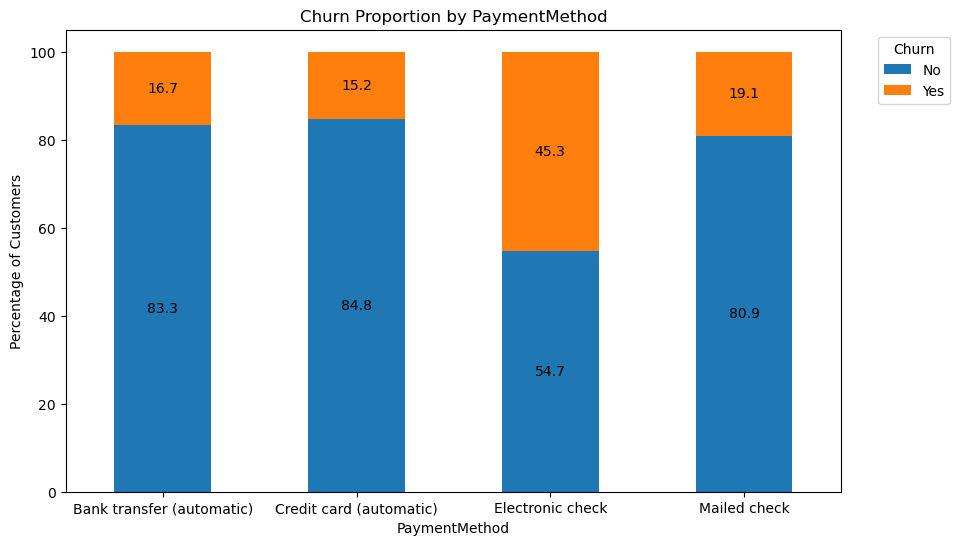

In [89]:
#Plot a bar chart to visualize the proportion of churned and retained customers 
# for each unique value of a given feature

# List the features
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Function to plot the bar chart
def plot_churn_proportion(data, feature):
    churn_data = telco_customer_churn_df.groupby([feature, 'Churn']).size().unstack(fill_value=0)
    churn_percent = churn_data.div(churn_data.sum(axis=1), axis=0) * 100
    
    ax = churn_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.xlabel(feature)
    plt.ylabel('Percentage of Customers')
    plt.title(f'Churn Proportion by {feature}')
    plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.xticks(rotation=0)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}', (x + width / 2, y + height / 2), ha='center', va='center')

    plt.show()

# Iterate through the list of features and plot the bar chart for each feature
for feature in features:
    plot_churn_proportion(telco_customer_churn_df, feature)

# Insights gained from the vizualiztion 

* Gender does not appear to be a significant factor in determining customer churn since the churn rates are nearly identical for both groups. It can be concluded that gender might not be an essential feature to include when building a churn prediction model, as it does not seem to have a strong influence on the likelihood of a customer churning.

* Senior citizens are more likely to churn compared to non-senior citizens. This insight indicates that being a senior citizen is a potential factor affecting customer churn.The telecom company could consider developing targeted marketing and retention strategies for senior citizens to address their specific needs and preferences, which may help in reducing the churn rate and improving customer retention within this demographic group.

* Customers without a partner show a higher churn rate compared to those with a partner. This insight suggests that having a partner is a potential factor in customer retention, as customers with partners are less likely to churn. The telecom company could consider tailoring their marketing and retention strategies to better cater to customers without partners, as they may have different preferences and requirements that affect their decision to churn or stay with the service.

* The churn proportions for the 'Dependents' feature indicate that customers without dependents have a higher churn rate compared to those with dependents. This insight suggests that having dependents is a potential factor in customer retention, as customers with dependents are less likely to churn. The telecom company could consider adjusting their marketing and retention strategies to better address the needs of customers without dependents, as they may have different preferences or requirements that influence their decision to churn or stay with the service.

* The churn proportions for the 'PhoneService' feature show a slight difference in churn rates between customers with phone service and those without phone service. Although there is a small difference in churn rates between the two groups, this insight suggests that the presence or absence of phone service may not be a major factor influencing customer churn. The telecom company may want to focus on other features with more significant differences in churn rates when developing marketing and retention strategies.

* Customers with multiple lines have a somewhat higher churn rate compared to those without multiple lines or with no phone service. While the 'MultipleLines' feature may provide some information regarding customer churn, its predictive power might be limited due to the small differences in churn rates.

* Customers with Fiber optic service have the highest churn rate, followed by those with DSL service. Customers without internet service have the lowest churn rate.The significant variation in churn rates based on the 'InternetService' feature suggests that it is a strong predictor of customer churn. The telecom company should consider focusing on improving the quality of their Fiber optic and DSL services or offering competitive pricing and promotions to reduce the churn rate. Additionally, they might want to explore why customers with no internet service are less likely to churn and apply similar strategies to other segments.

* Customers without online security have the highest churn rate, while those with no internet service have the lowest churn rate. Customers with online security show a significantly lower churn rate compared to those without it. The substantial variation in churn rates based on the 'OnlineSecurity' feature suggests that it is a strong predictor of customer churn. The telecom company should consider promoting the benefits of online security and offering attractive packages that include online security features to help reduce the churn rate.

* Customers without online backup have the highest churn rate, while those with no internet service have the lowest churn rate. Customers with online backup show a noticeably lower churn rate compared to those without it.The considerable variation in churn rates based on the 'OnlineBackup' feature suggests that it is a strong predictor of customer churn. The telecom company should consider promoting the advantages of online backup and offering appealing packages that include online backup features to help reduce the churn rate.

* Customers without device protection have the highest churn rate, while those with no internet service have the lowest churn rate. Customers with device protection show a notably lower churn rate compared to those without it. The substantial variation in churn rates based on the 'DeviceProtection' feature suggests that it is a strong predictor of customer churn. The telecom company should consider promoting the benefits of device protection and offering attractive packages that include device protection features to help reduce the churn rate.

* Customers without tech support have the highest churn rate, while those with no internet service have the lowest churn rate. Customers with tech support show a significantly lower churn rate compared to those without it. The substantial variation in churn rates based on the 'TechSupport' feature suggests that it is a strong predictor of customer churn. The telecom company should consider promoting the advantages of tech support and offering appealing packages that include tech support features to help reduce the churn rate.

* Customers without streaming TV show a slightly higher churn rate compared to those with streaming TV. The differences in churn rates based on the 'StreamingTV' feature suggest that it may have a moderate influence on customer churn. The telecom company might want to explore the preferences of customers regarding streaming TV and consider offering tailored packages or promotions that cater to these preferences to help reduce the churn rate.

* Customers without streaming movies show a slightly higher churn rate compared to those with streaming movies. The differences in churn rates based on the 'StreamingMovies' feature suggest that it may have a moderate influence on customer churn. The telecom company might want to explore the preferences of customers regarding streaming movies and consider offering tailored packages or promotions that cater to these preferences to help reduce the churn rate.

* Customers with month-to-month contracts have the highest churn rate, while those with two-year contracts have the lowest churn rate. The substantial variation in churn rates based on the 'Contract' feature suggests that it is a strong predictor of customer churn. The telecom company should consider promoting the benefits of longer-term contracts and offering attractive packages or incentives to encourage customers to commit to longer contract periods.

* Customers with paperless billing have a higher churn rate compared to those without it.The differences in churn rates based on the 'PaperlessBilling' feature suggest that it has some influence on customer churn. The telecom company might want to explore the reasons behind the higher churn rate for customers with paperless billing and consider offering tailored packages, promotions, or improved customer support to address the specific needs of this segment, which could help reduce the churn rate.

* Customers using electronic check payments have the highest churn rate, while those using credit card (automatic) payments have the lowest churn rate. The other two payment methods have similar churn rates. The variation in churn rates based on the 'PaymentMethod' feature suggests that it is an influential factor in customer churn. The telecom company should explore the reasons behind the higher churn rate for customers using electronic checks and consider offering incentives or improved support for adopting automatic payment methods, such as bank transfers and credit card payments, to help reduce the churn rate.





In [90]:
# Drop the 'CustomerID' column
telco_customer_churn_df = telco_customer_churn_df.drop(['customerID', 'gender'], axis=1)

# Print the modified dataframe
display(telco_customer_churn_df)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [91]:
# Encode the features dataset's categorical variables using get_dummies
telco_encoded = pd.get_dummies(telco_customer_churn_df)

# Review the features DataFrame
telco_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
0,0,1,29.85,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,34,56.95,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,0,2,53.85,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2,70.70,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


# Clustering 

In [92]:
# Create and initialize the K-means model instance for 4 clusters
model = KMeans(n_clusters=4, random_state=1)

# Fit the data to the instance of the model
model.fit(telco_encoded)


KMeans(n_clusters=4, random_state=1)

In [93]:
# Make predictions about the data clusters using the trained model
customer_segment_4 = model.predict(telco_encoded)

# Print the predictions
print(customer_segment_4)

[1 3 1 ... 1 2 0]


In [94]:
# Create a copy of the DataFrame and name it as telco_customer_churn_predictions_df
telco_customer_churn_predictions_df = telco_encoded.copy()

# Add a column to the DataFrame that contains the customer_segment information
telco_customer_churn_predictions_df['customer_segment_4'] = customer_segment_4

# Review the DataFrame
telco_customer_churn_predictions_df.head()

,SeniorCitizen,tenure,MonthlyCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes,customer_segment_4
0,0,1,29.85,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,34,56.95,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,3
2,0,2,53.85,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
3,0,45,42.30,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,3
4,0,2,70.70,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,2


In [95]:
# Create a scatter plot using the hvplot library to visualize the relationship between 
# tenure and MonthlyCharges
telco_customer_churn_predictions_df.hvplot.scatter(
    x="tenure", 
    y="MonthlyCharges", 
    by="customer_segment_4",
)

:NdOverlay   [customer_segment_4]
   :Scatter   [tenure]   (MonthlyCharges)

# Insights gained from the segmentation visualization

*  Segment 0 has high monthly charges and long tenure, which may indicate high-value customers who are willing to pay more for the service and have been loyal to the company for a longer time. The telecom company may want to focus their retention efforts on this segment to keep them engaged and satisfied with the service.

* Segment 1 has low monthly charges and short tenure, which may indicate that these customers are not as valuable to the company and may be more likely to churn. The telecom company may want to consider ways to increase engagement and value for these customers to reduce churn rates.

* Segment 2 has high monthly charges but short tenure, which may indicate that these customers are not fully satisfied with the service and may be at a higher risk of churning. The telecom company may want to investigate the reasons for dissatisfaction and address them to reduce churn rates in this segment.

* Segment 3 has low monthly charges and long tenure, which may indicate customers who have been loyal to the company for a long time despite lower pricing. These customers may be less likely to churn, but The telecom company may still want to focus on retention efforts to keep them engaged and satisfied.

In [96]:
# Calculate churn rate by cluster
churn_rate_by_cluster = telco_customer_churn_predictions_df.groupby('customer_segment_4')['Churn_Yes'].mean()

# Print the churn rate for each cluster
display(churn_rate_by_cluster)



customer_segment_4
0    0.159265
1    0.245272
2    0.491308
3    0.047702
Name: Churn_Yes, dtype: float64

In [97]:
# Separate the data into labels and features

# Create the labels set, y
y = telco_customer_churn_df['Churn']

# Create the features DataFrame, X
X = telco_customer_churn_df.drop('Churn', axis=1)

In [98]:
# Encode the features dataset's categorical variables using get_dummies
X = pd.get_dummies(X)

# Review the features DataFrame
X.head()

,SeniorCitizen,tenure,MonthlyCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


# Split the data into training and testing datasets 

In [99]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [100]:
# Review the distinct values from y
y_train.value_counts()

No     3847
Yes    1435
Name: Churn, dtype: int64

In [101]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

# Balance the Data

In [102]:
# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)

In [103]:
# Count distinct values for the resampled target data
y_train_rus.value_counts()

No     1435
Yes    1435
Name: Churn, dtype: int64

# Implement the Random Forest and Logistic Regression models to predict customer churn

In [104]:
# Instantiate a RandomForestClassifier instance
rf_model = RandomForestClassifier(random_state=1)
lr_model = LogisticRegression(random_state=1)



In [105]:
# Fit the traning data to the model
rf_model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(random_state=1)

In [106]:
# Fit the traning data to the model
lr_model.fit(X_train_rus, y_train_rus)

LogisticRegression(random_state=1)

In [107]:
# Make predictions using the test data
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate and compare the performance of the machine learning models

In [108]:
# Calculate the balanced_accuracy scores for Logistic Regression and Random Forest
balanced_accuracy_lr = balanced_accuracy_score(y_test, y_pred_lr)
balanced_accuracy_rf = balanced_accuracy_score(y_test, y_pred_rf)

# Print the balanced_accuracy scores
print("Logistic Regression Balanced Accuracy:", balanced_accuracy_lr)
print("Random Forest Balanced Accuracy:", balanced_accuracy_rf)

Logistic Regression Balanced Accuracy: 0.742626554474769
Random Forest Balanced Accuracy: 0.7615528599557575


In [109]:
#Calculate the AUC score for each model

#For the logistic regression model
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]  
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

#For the random forest model
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("AUC Score for Logistic Regression:", auc_lr)
print("AUC Score for Random Forest:", auc_rf)



AUC Score for Logistic Regression: 0.7943448546494466
AUC Score for Random Forest: 0.7967696790168044


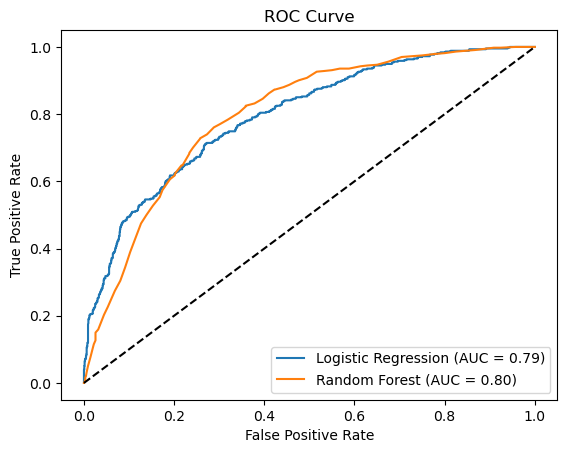

In [110]:

# Convert the labels to numeric values
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)

# Calculate the ROC curve points
fpr_lr, tpr_lr, _ = roc_curve(y_test_numeric, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test_numeric, y_pred_proba_rf)

# Calculate the AUC scores
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')
plt.show()


In [111]:

# Calculate the confusion matrices for Logistic Regression and Random Forest
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the confusion matrices
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix_lr)
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix_rf)

Logistic Regression Confusion Matrix:
[[913 414]
 [ 88 346]]

Random Forest Confusion Matrix:
[[951 376]
 [ 84 350]]


In [113]:

# Calculate the classification reports for Logistic Regression and Random Forest
classification_report_lr = classification_report_imbalanced(y_test, y_pred_lr)
classification_report_rf = classification_report_imbalanced(y_test, y_pred_rf)

# Print the classification reports
print("Logistic Regression Classification Report:")
print(classification_report_lr)
print("\nRandom Forest Classification Report:")
print(classification_report_rf)


Logistic Regression Classification Report:
                   pre       rec       spe        f1       geo       iba       sup

         No       0.91      0.69      0.80      0.78      0.74      0.54      1327
        Yes       0.46      0.80      0.69      0.58      0.74      0.55       434

avg / total       0.80      0.71      0.77      0.73      0.74      0.55      1761


Random Forest Classification Report:
                   pre       rec       spe        f1       geo       iba       sup

         No       0.92      0.72      0.81      0.81      0.76      0.57      1327
        Yes       0.48      0.81      0.72      0.60      0.76      0.58       434

avg / total       0.81      0.74      0.78      0.76      0.76      0.58      1761

